<a href="https://colab.research.google.com/github/UjjwalSaxena/Automold--Road-Augmentation-Library/blob/master/optimalprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import linear_model
import numpy as np

def normalize(x_array):
    x_array = np.asarray(x_array)
    return (x_array - min(x_array))/(max(x_array)-min(x_array))

def create_records(x_array):
    return np.transpose(x_array)

def convert_to_numeric(x_array, test = None):
    le = preprocessing.LabelEncoder()
    le.fit(np.unique(x_array))
    if test is None:
        return le.transform(x_array)
    else:
        return le.transform(test)

def correctify_data(characteristics):
    min_length = len(characteristics[0])
    new_characteristics=[]
    for characteristic in characteristics:
        if len(characteristic) < min_length:
            min_length = len(characteristic)


    for characteristic in characteristics:
        if type(characteristic[0]) == type("string"):
            numeric_labels = convert_to_numeric(characteristic[:min_length])
            new_characteristics.append(normalize(numeric_labels))  # confused about this
        else:
            new_characteristics.append(normalize(characteristic[:min_length]))
    return new_characteristics

def correctify_test_data(characteristics, test_data):
    new_test_data=[]
    for i in range(len(test_data)):

        if type(test_data[i]) == type("string"):
            numeric_labels = convert_to_numeric(characteristics[i])
            numeric_test = convert_to_numeric(characteristics[i], test=[test_data[i]])
            new_test_data.append((numeric_test[0] - min(numeric_labels)) / (max(numeric_labels) - min(numeric_labels)))
        else:
            new_test_data.append((test_data[i] - min(characteristics[i])) / (max(characteristics[i]) - min(characteristics[i])))
    return new_test_data

characteristics = [[2,4,6,3,2,4,6,8,2,4],[222,444,233,112,443,532,223,297,211,328],[1000.1,234234.3,23434.5,46555.88, 78345.5,4566.6,22333.5,7777.3,657.3,67878.3],["canada","australia","canada","india","london","canada","india","australia","london","india"]]
bids = [112, 3333, 2312, 998, 768, 470, 123, 6546, 866, 911]
# characteristics is an array of 'n' un-normalized value-arrays of each characteristic.

new_characteristics = correctify_data(characteristics)
new_characteristics = create_records(np.asarray(new_characteristics, dtype=float))
print(new_characteristics)
bids = np.asarray(bids, dtype=float)[:len(new_characteristics)]
print(bids)
# clf = SVC()
clf = linear_model.LinearRegression()
clf.fit(new_characteristics, bids) #confused about this

#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

test_data =[5, 555, 1200, "india"]
print("test_data", test_data)
test_data = correctify_test_data(characteristics, test_data)
print("corrected test_data", test_data)
print(clf.predict(np.asarray([test_data]).astype(float)))


[[0.         0.26190476 0.00146761 0.33333333]
 [0.33333333 0.79047619 1.         0.        ]
 [0.66666667 0.28809524 0.09751474 0.33333333]
 [0.16666667 0.         0.19650299 0.66666667]
 [0.         0.78809524 0.3326021  1.        ]
 [0.33333333 1.         0.01673666 0.33333333]
 [0.66666667 0.26428571 0.09280109 0.66666667]
 [1.         0.44047619 0.03048245 0.        ]
 [0.         0.23571429 0.         1.        ]
 [0.33333333 0.51428571 0.28778947 0.66666667]]
[ 112. 3333. 2312.  998.  768.  470.  123. 6546.  866.  911.]
test_data [5, 555, 1200, 'india']
corrected test_data [0.5, 1.0547619047619048, 0.0023234308172465612, 0.6666666666666666]
[1360.1649173]


In [3]:
from google.colab import files
files.upload()

Saving SelectedColumns.csv to SelectedColumns.csv


{'SelectedColumns.csv': b'LotArea,LandContour,Neighborhood,BldgType,HouseStyle,Foundation,BsmtQual,Heating,HeatingQC,TotRmsAbvGrd,SalePrice\r\n8450,Lvl,CollgCr,1Fam,2Story,PConc,Gd,GasA,Ex,8,208500\r\n9600,Lvl,Veenker,1Fam,1Story,CBlock,Gd,GasA,Ex,6,181500\r\n11250,Lvl,CollgCr,1Fam,2Story,PConc,Gd,GasA,Ex,6,223500\r\n9550,Lvl,Crawfor,1Fam,2Story,BrkTil,TA,GasA,Gd,7,140000\r\n14260,Lvl,NoRidge,1Fam,2Story,PConc,Gd,GasA,Ex,9,250000\r\n14115,Lvl,Mitchel,1Fam,1.5Fin,Wood,Gd,GasA,Ex,5,143000\r\n10084,Lvl,Somerst,1Fam,1Story,PConc,Ex,GasA,Ex,7,307000\r\n10382,Lvl,NWAmes,1Fam,2Story,CBlock,Gd,GasA,Ex,7,200000\r\n6120,Lvl,OldTown,1Fam,1.5Fin,BrkTil,TA,GasA,Gd,8,129900\r\n7420,Lvl,BrkSide,2fmCon,1.5Unf,BrkTil,TA,GasA,Ex,5,118000\r\n11200,Lvl,Sawyer,1Fam,1Story,CBlock,TA,GasA,Ex,5,129500\r\n11924,Lvl,NridgHt,1Fam,2Story,PConc,Ex,GasA,Ex,11,345000\r\n12968,Lvl,Sawyer,1Fam,1Story,CBlock,TA,GasA,TA,4,144000\r\n10652,Lvl,CollgCr,1Fam,1Story,PConc,Gd,GasA,Ex,7,279500\r\n10920,Lvl,NAmes,1Fam,1Story,CB

In [16]:
# from csv import DictReader
# with open("SelectedColumns.csv") as f:
#     a1 = [row for row in DictReader(f)]

# print(a1)
import csv
with open("SelectedColumns.csv", "rb") as f:
    reader = csv.reader(f)
    i = next(reader)

    print(i)
 
# import pandas

# data = pandas.read_csv("SelectedColumns.csv", header=0)

# col_a = list(data.LotArea)
# # col_b = list(data.b)
# # col_c = list(data.c)

# print(col_a)

Error: ignored

## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

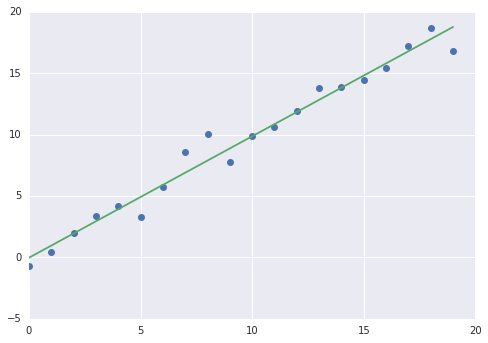

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

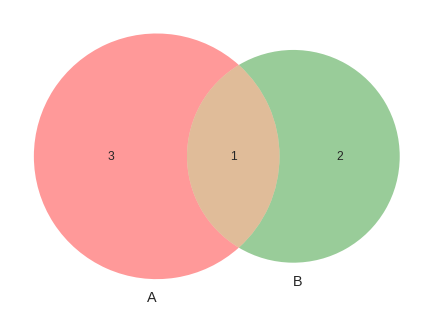

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).